# What are the main drivers of the level of damage ? 

The goal of this part is to determine which variable explains the level of damage as an output of the damage function. To do so, we will proceed to an econometric regression of the level of damage by other explanatory variables. 

The general idea is that the quantitative level of damage given by the model is driven by multiple factors : 

- physical drivers, such as the level of climate change (temperature change, radiative forcing, etc.)
- methodological drivers, such as the choice of this or that modelling choice
- ethical drivers, such as the way spatial, social or generational equities are represented

In order to quantitatively assess the role of each factor in the model, we will perform linear regressions, in which the level of damage is assumed to be explained by a set of explanatory variables. These explanatory variables have been choosen or designed to be representative of one of the above mentionned choices. 

The general form is the following : 

$$


\begin{align*}
\text{damage} = & \ \beta_0  + \underbrace{\beta_1 \cdot \text{temperature} + \beta_2 \cdot \text{radiative forcing}}_\text{Physical variables}  + \underbrace{\beta_3 \cdot \text{equation}}_\text{Methodological variables} \\
& + \underbrace{\beta_1 \cdot \text{exponent} + \beta_2 \cdot \text{normalisation constant} + \beta_2 \cdot \text{discount rate} + \beta_2 \cdot \text{social parameter}}_\text{Ethical variables}  + \epsilon
\end{align*}

$$

where:
- $\text{damage}$ is the level of damage
- $\beta_0$ is the intercept term
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the variables
- $\text{exponent}, \text{normalisation constant}, \ldots, \text{temperature}$ are the independent variables
- $\epsilon$ is the error term


The form of the damage functions in the model is : 

$$

D_{t,r} = f(\text{temperature}, \text{other drivers})_{t,r} \cdot GDP_{t,r} \cdot (\frac{y_{t,r}}{y_0})^\alpha

$$

$$

\text{Total damage} = \sum D_{t,r}

$$

### Preparation of the data

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [2]:
# This cell stores the variables for the rest of the script, so it is easier to change if needed
data_file_path = '../../../results/batch/run_ds_18_07.nc'

First, we have to load the data that came as an output of the model. Variables of interest are stored in a netcdf file (.nc), that we will load as a dataset, and convert to a pandas dataframe. 

In [3]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'extra_extra_gdp_modifyer',
       'total_radiative_forcing', 
       'gross_domestic_product_nominal', 'population_35_regions', 
       'average_disposable_income_per_capita']

damage_variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_total_damage',
       'fund_tot_eq_fund_total_impact', 'witness_tot_eq_witness_total_impact']      

ds = xr.open_dataset(data_file_path)
df = ds[variables].to_dataframe().reset_index()

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


We now have a dataframe : 

In [4]:
df

,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,extra_extra_gdp_modifyer,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita
0,2005.0,AUSTRIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-1.098665,12818.021693,inf,1.714491,3.786850e+05,8.253656e+06,0.000000
1,2005.0,BELGIUM,4.552596e+02,5.499544e+02,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,9.292477e+02,0.845000,6.541007e+09,-1.098665,12818.021693,0.484972,1.714491,4.580816e+05,1.054688e+07,24767.399895
2,2005.0,BULGARIA,3.365703e+02,4.065775e+02,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,6.869865e+02,0.845000,6.541007e+09,-1.098665,12818.021693,3.328578,1.714491,4.934207e+04,7.686964e+06,4290.060541
3,2005.0,CROATIA,1.805931e+02,2.181568e+02,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,3.686154e+02,0.845000,6.541007e+09,-1.098665,12818.021693,1.784685,1.714491,4.937873e+04,4.378066e+06,7565.730576
4,2005.0,CYPRUS,3.437053e+01,4.151966e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,7.015501e+01,0.845000,6.541007e+09,-1.098665,12818.021693,0.828186,1.714491,2.025158e+04,1.027657e+06,15217.411656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,2060.0,INDIA,1.082256e+05,5.521826e+04,0.0,1.097148e+10,2.813391e+04,1.097148e+10,1.846274e+05,9.751358e+04,2.301589,8.386047e+09,0.075333,35991.215967,0.746499,4.301696,4.027580e+06,1.541035e+09,742.585934
1956,2060.0,LATAM,2.632613e+05,1.343197e+05,0.0,3.113982e+10,4.678880e+03,3.113982e+10,2.172643e+06,2.372041e+05,2.301589,8.386047e+09,0.075333,35991.215967,0.912993,4.301696,8.010561e+06,4.004570e+08,10750.534066
1957,2060.0,RUSSIA,5.946163e+05,3.033819e+05,0.0,2.869332e+10,6.452855e+02,2.869332e+10,1.450490e+07,5.357622e+05,2.301589,8.386047e+09,0.075333,35991.215967,1.053842,4.301696,1.567490e+07,1.373280e+08,72197.949740
1958,2060.0,USMCA,3.108425e+06,1.585964e+06,0.0,1.075003e+11,4.163049e+03,1.075003e+11,1.982213e+07,2.800758e+06,2.301589,8.386047e+09,0.075333,35991.215967,1.078673,4.301696,8.005607e+07,4.746416e+08,98352.078177


### Cleaning the dataset from coef outliers

We now compute the spatial equity coefficient, which takes the form : 

$$ \text{coef} = (\frac{y_{t,r}}{y_0})^\beta $$

In [5]:
#df['coef'] = ((df['gross_domestic_product_nominal']/df['population_35_regions'] )/ df['extra_extra_normalisation_constant'] ) ** df['extra_extra_exponent']
#df['coef'] = np.random.normal(0, 2, df.shape[0])
#df['coef'] = ((df['average_disposable_income_per_capita'])/ df['extra_extra_normalisation_constant'] ) ** df['extra_extra_exponent']
df = df.rename(columns={'extra_extra_gdp_modifyer': 'coef'})
df

,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita,coef
0,2005.0,AUSTRIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-1.098665,12818.021693,1.714491,3.786850e+05,8.253656e+06,0.000000,inf
1,2005.0,BELGIUM,4.552596e+02,5.499544e+02,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,9.292477e+02,0.845000,6.541007e+09,-1.098665,12818.021693,1.714491,4.580816e+05,1.054688e+07,24767.399895,0.484972
2,2005.0,BULGARIA,3.365703e+02,4.065775e+02,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,6.869865e+02,0.845000,6.541007e+09,-1.098665,12818.021693,1.714491,4.934207e+04,7.686964e+06,4290.060541,3.328578
3,2005.0,CROATIA,1.805931e+02,2.181568e+02,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,3.686154e+02,0.845000,6.541007e+09,-1.098665,12818.021693,1.714491,4.937873e+04,4.378066e+06,7565.730576,1.784685
4,2005.0,CYPRUS,3.437053e+01,4.151966e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,7.015501e+01,0.845000,6.541007e+09,-1.098665,12818.021693,1.714491,2.025158e+04,1.027657e+06,15217.411656,0.828186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,2060.0,INDIA,1.082256e+05,5.521826e+04,0.0,1.097148e+10,2.813391e+04,1.097148e+10,1.846274e+05,9.751358e+04,2.301589,8.386047e+09,0.075333,35991.215967,4.301696,4.027580e+06,1.541035e+09,742.585934,0.746499
1956,2060.0,LATAM,2.632613e+05,1.343197e+05,0.0,3.113982e+10,4.678880e+03,3.113982e+10,2.172643e+06,2.372041e+05,2.301589,8.386047e+09,0.075333,35991.215967,4.301696,8.010561e+06,4.004570e+08,10750.534066,0.912993
1957,2060.0,RUSSIA,5.946163e+05,3.033819e+05,0.0,2.869332e+10,6.452855e+02,2.869332e+10,1.450490e+07,5.357622e+05,2.301589,8.386047e+09,0.075333,35991.215967,4.301696,1.567490e+07,1.373280e+08,72197.949740,1.053842
1958,2060.0,USMCA,3.108425e+06,1.585964e+06,0.0,1.075003e+11,4.163049e+03,1.075003e+11,1.982213e+07,2.800758e+06,2.301589,8.386047e+09,0.075333,35991.215967,4.301696,8.005607e+07,4.746416e+08,98352.078177,1.078673


c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


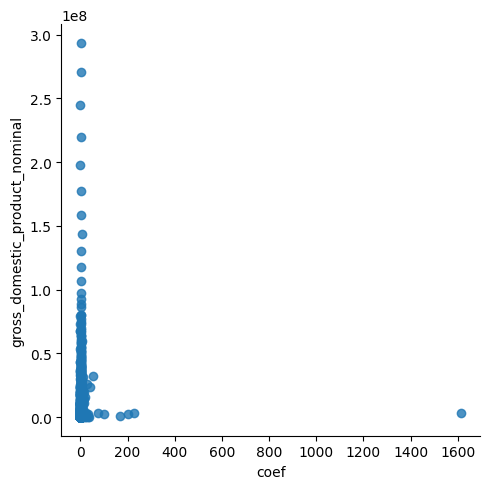

In [6]:
sns.lmplot(data=df, x='coef', y='gross_domestic_product_nominal')

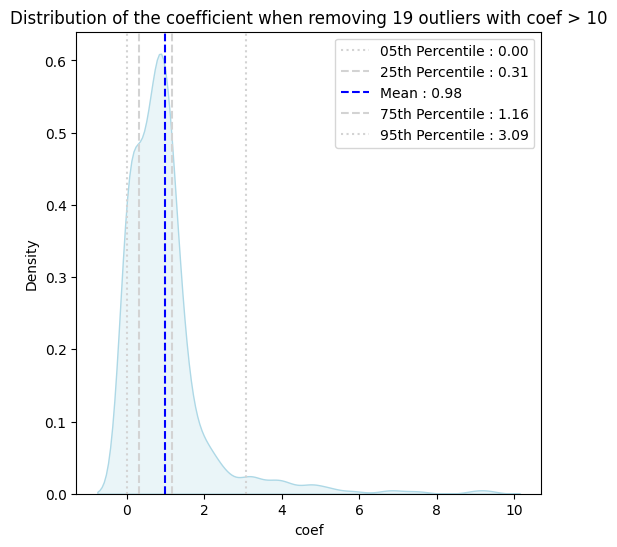

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

coef_threshold = 10
df_outliers = df[df['coef'] > coef_threshold]
df = df[df['coef'] < coef_threshold]
sns.kdeplot(data=df, x='coef', ax=ax, color='lightblue', fill=True)

plt.axvline(df['coef'].quantile(0.05), color='lightgrey', linestyle='dotted', label=f'05th Percentile : {df["coef"].quantile(0.05):.2f}')
plt.axvline(df['coef'].quantile(0.25), color='lightgrey', linestyle='--', label=f'25th Percentile : {df["coef"].quantile(0.25):.2f}')
plt.axvline(df['coef'].mean(), color='blue', linestyle='--', label=f'Mean : {df["coef"].mean():.2f}')
plt.axvline(df['coef'].quantile(0.75), color='lightgrey', linestyle='--', label=f'75th Percentile : {df["coef"].quantile(0.75):.2f}')
plt.axvline(df['coef'].quantile(0.95), color='lightgrey', linestyle='dotted', label=f'95th Percentile : {df["coef"].quantile(0.95):.2f}')



plt.title(f'Distribution of the coefficient when removing {df_outliers.shape[1]} outliers with coef > {coef_threshold}')
plt.legend()
plt.show()

We need to have all the damages in the same column to process to the regression : 

In [8]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'coef'], var_name='equation',  value_vars=damage_variables, value_name='total_damage')

# Removing outliers equations 
df_melted = df_melted[~df_melted['equation'].isin(['fund_tot_total_damage', 'fund_tot_eq_fund_total_impact', 'fund_tot_eq_monetary_impact', 'dsk_tot_eq_dsk_total_impact'])] 

# Drop infinite values
infinites = df_melted[(df_melted['total_damage'] == np.inf) | (df_melted['total_damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)

df_melted


,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,equation,total_damage
0,2005.0,BELGIUM,-1.098665,12818.021693,1.714491,0.484972,define_tot_eq_define_total_impact,4.552596e+02
1,2005.0,BULGARIA,-1.098665,12818.021693,1.714491,3.328578,define_tot_eq_define_total_impact,3.365703e+02
2,2005.0,CROATIA,-1.098665,12818.021693,1.714491,1.784685,define_tot_eq_define_total_impact,1.805931e+02
3,2005.0,CYPRUS,-1.098665,12818.021693,1.714491,0.828186,define_tot_eq_define_total_impact,3.437053e+01
4,2005.0,CZECH REPUBLIC,-1.098665,12818.021693,1.714491,1.306405,define_tot_eq_define_total_impact,4.986509e+02
...,...,...,...,...,...,...,...,...
12497,2060.0,INDIA,0.075333,35991.215967,4.301696,0.746499,witness_tot_eq_witness_total_impact,9.751358e+04
12498,2060.0,LATAM,0.075333,35991.215967,4.301696,0.912993,witness_tot_eq_witness_total_impact,2.372041e+05
12499,2060.0,RUSSIA,0.075333,35991.215967,4.301696,1.053842,witness_tot_eq_witness_total_impact,5.357622e+05
12500,2060.0,USMCA,0.075333,35991.215967,4.301696,1.078673,witness_tot_eq_witness_total_impact,2.800758e+06


Here, we try to spot years that would be anormal.

In [9]:
df_2016 = df_melted[df_melted['time'] == 2015]
df_2016

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,equation,total_damage
325,2015.0,AUSTRIA,1.677827,42004.354252,2.117411,0.000000,define_tot_eq_define_total_impact,0.000000
326,2015.0,BELGIUM,1.677827,42004.354252,2.117411,0.427727,define_tot_eq_define_total_impact,634.217873
327,2015.0,BULGARIA,1.677827,42004.354252,2.117411,0.023408,define_tot_eq_define_total_impact,3.738644
328,2015.0,CROATIA,1.677827,42004.354252,2.117411,0.058584,define_tot_eq_define_total_impact,9.363636
329,2015.0,CYPRUS,1.677827,42004.354252,2.117411,0.181885,define_tot_eq_define_total_impact,11.922954
...,...,...,...,...,...,...,...,...
11071,2015.0,INDIA,1.677827,42004.354252,2.117411,0.001996,witness_tot_eq_witness_total_impact,26.790780
11072,2015.0,LATAM,1.677827,42004.354252,2.117411,0.039670,witness_tot_eq_witness_total_impact,829.007924
11073,2015.0,RUSSIA,1.677827,42004.354252,2.117411,0.045852,witness_tot_eq_witness_total_impact,412.993969
11074,2015.0,USMCA,1.677827,42004.354252,2.117411,0.622819,witness_tot_eq_witness_total_impact,84301.638297


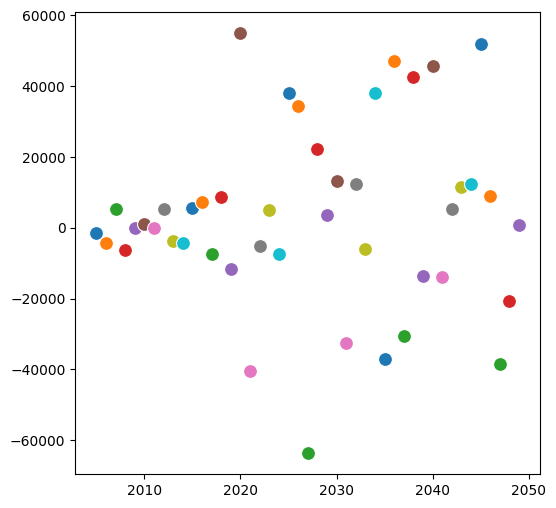

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

for year in range(2005, 2050):

    dif = df_melted.loc[df_melted['time'] == year+1, 'total_damage'].mean() - df_melted.loc[df_melted['time'] == year, 'total_damage'].mean()
    sns.scatterplot(x=[year], y=[dif], ax=ax, s=100, label=f'{year} - {year+1}', legend=False)



plt.show()

Since there is obviously something happening in 2015 and we do not understand why, we will remove the year 2015. 

In [11]:
#df_melted = df_melted[~df_melted['time'].isin([2015, 2043,  2048])]

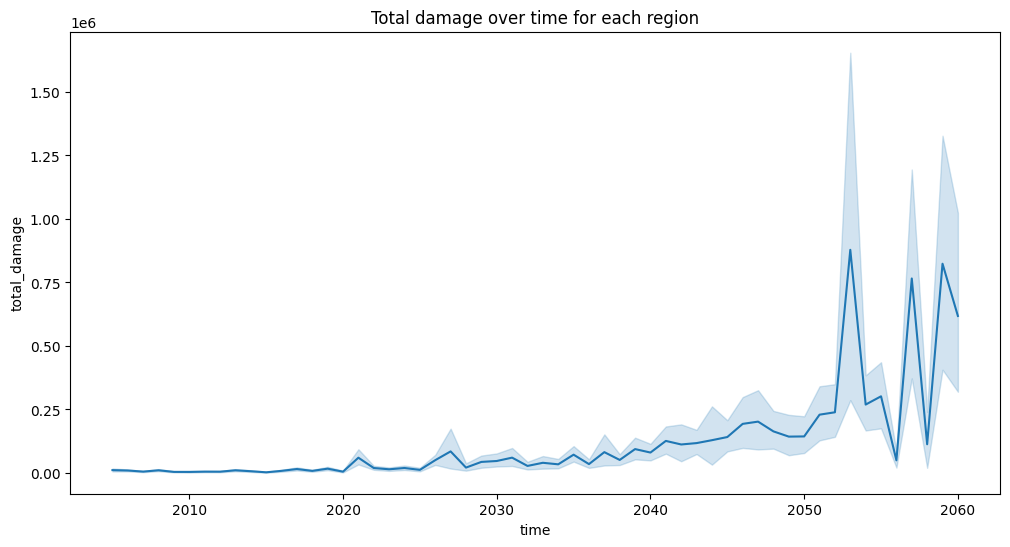

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))


#df_melted_grouped_region = df_melted.groupby(['time', 'REGIONS 35 I']).mean().reset_index()
sns.lineplot(data=df_melted, x='time', y='total_damage', legend=True, estimator='mean', ax=ax)

plt.title('Total damage over time for each region')
#ax.set_yscale('log')

plt.show()  

### Checking where and when the damages are the higher

This step serves to check irregularities in the experimental setup. 

<Axes: xlabel='time', ylabel='total_damage'>

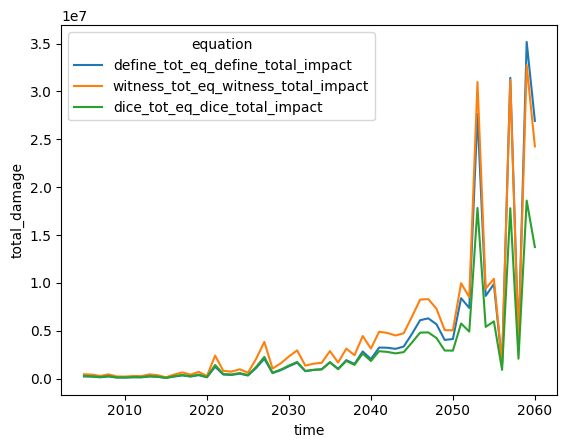

In [13]:
hd_country = df_melted.groupby(['time', 'total_radiative_forcing', 'equation']).sum().reset_index().sort_values(ascending=False, by='total_damage')

sns.lineplot(data=hd_country, x='time', y='total_damage', hue='equation', legend=True, estimator='mean')

In [38]:
# Drop infinite values
infinites = df_melted[(df_melted['total_damage'] == np.inf) | (df_melted['total_damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)
infinites.size

0

## Preparing the regression

### With all variables, on a global level

In [15]:
# Group by time, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()
df_regression = df_regression.drop( columns=['REGIONS 35 I'])

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression = df_regression.apply(pd.to_numeric, errors='coerce')
df_regression = df_regression.dropna()


df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-1.098665,12818.021693,1.714491,35.992621,2.210159e+05,False,False
1,2005.0,-1.098665,12818.021693,1.714491,35.992621,2.669876e+05,True,False
2,2005.0,-1.098665,12818.021693,1.714491,35.992621,4.511240e+05,False,True
3,2006.0,-0.277378,26412.828454,1.771211,37.101971,1.993559e+05,False,False
4,2006.0,-0.277378,26412.828454,1.771211,37.101971,2.405076e+05,True,False
...,...,...,...,...,...,...,...,...
163,2059.0,0.470184,48536.702854,4.250759,40.317500,1.859208e+07,True,False
164,2059.0,0.470184,48536.702854,4.250759,40.317500,3.274412e+07,False,True
165,2060.0,0.075333,35991.215967,4.301696,30.702805,2.691910e+07,False,False
166,2060.0,0.075333,35991.215967,4.301696,30.702805,1.373452e+07,True,False


## Checking some hypothesis on the dataset

We want to check the colinearity of our variables. To do so, we compute the correleation matrix, which computes two by two the correlation between multiple variables. We then represent it in the shape of a heatamp.

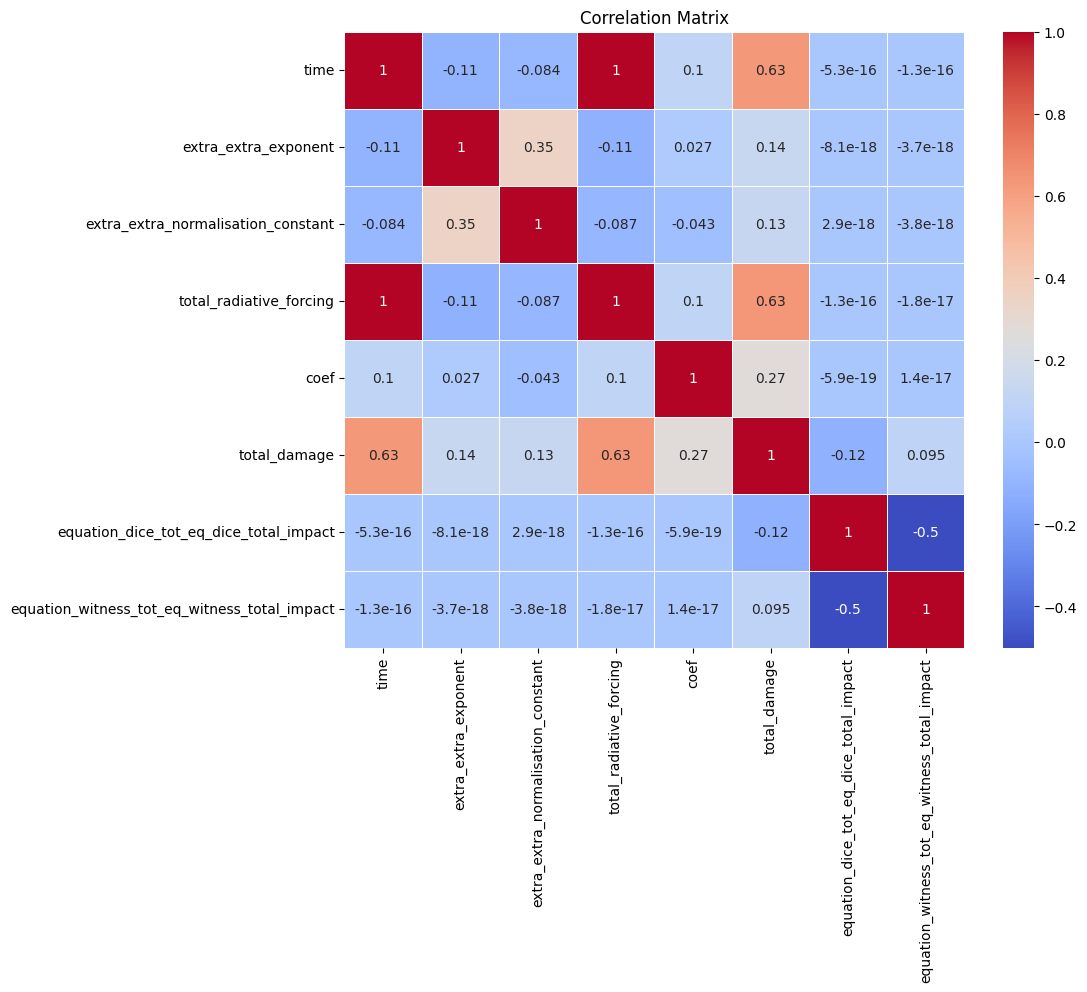

In [16]:
corr_matrix = df_regression.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We now want to visualize pair plots.

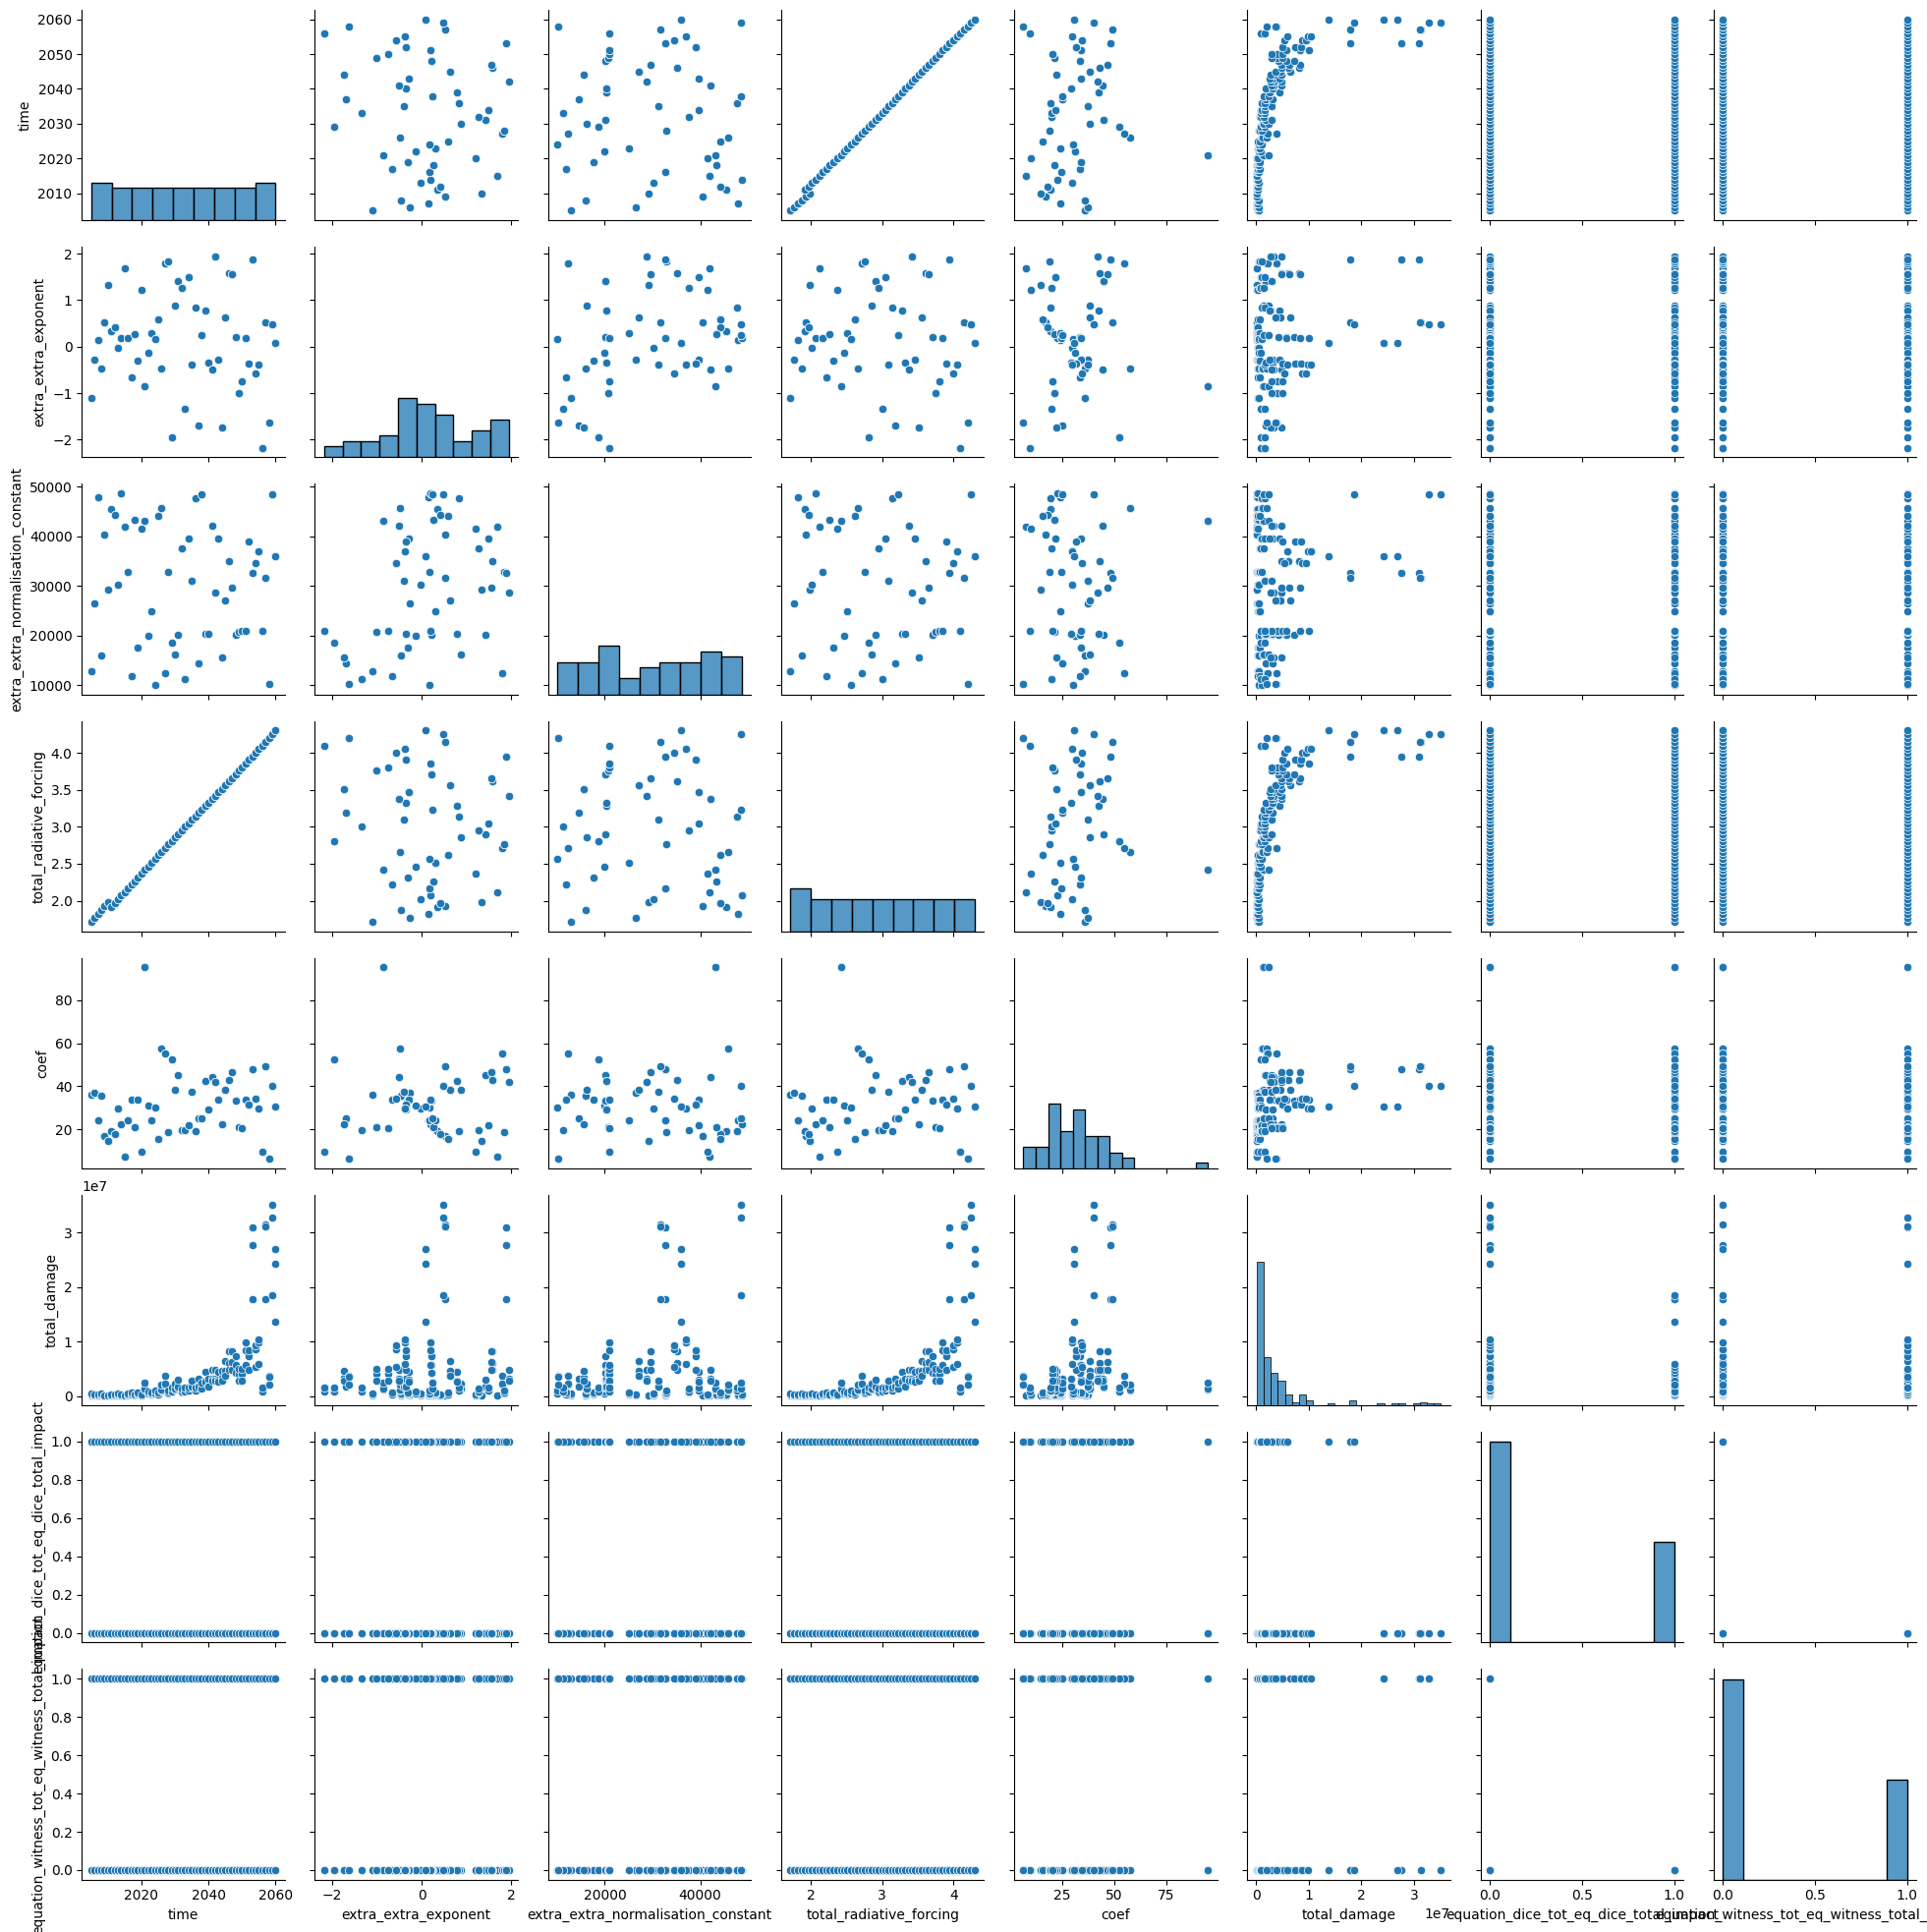

In [17]:
sns.pairplot(df_regression)

If we only do it with variables we have in the regressions : 

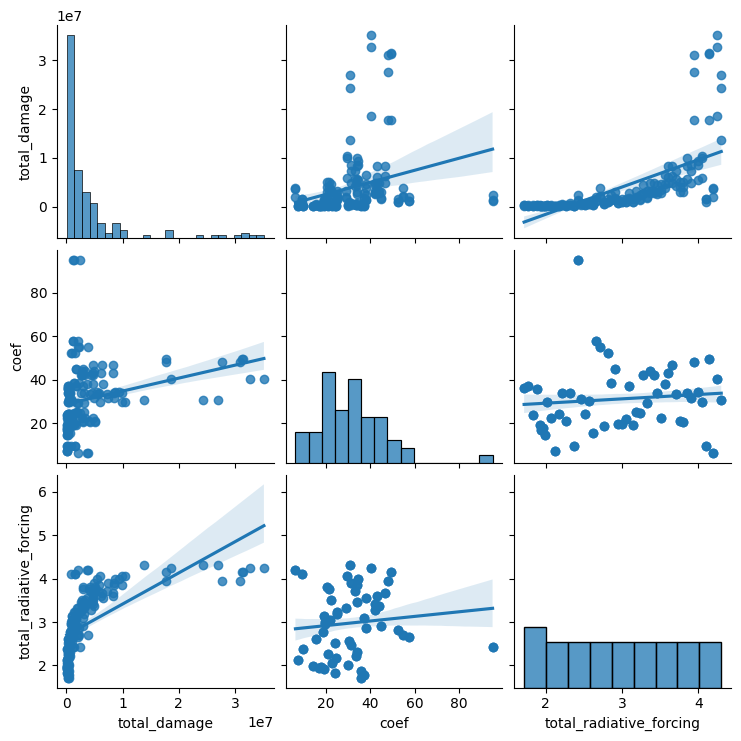

In [18]:
sns.pairplot(df_regression[['total_damage', 'coef', 'total_radiative_forcing']], kind='reg')

Here, I am trying to make the relationship between the radiative forcing and the total damage linear by taking the log of it.

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


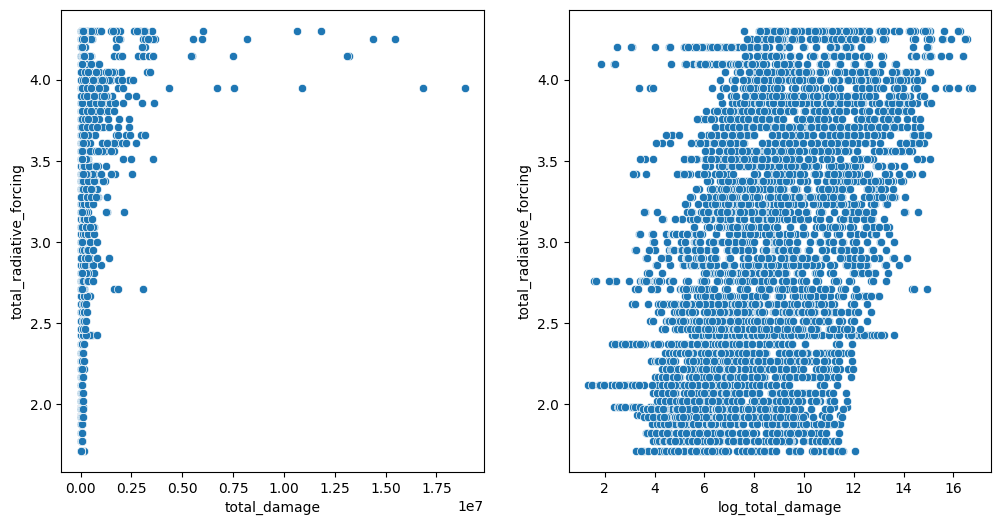

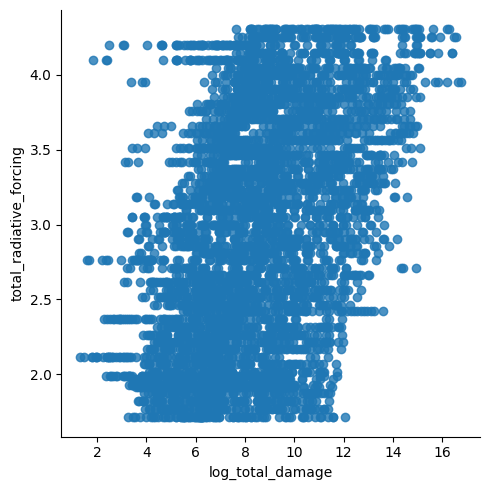

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))



df_regression['log_total_damage'] = np.log(df_regression['total_damage'])
sns.scatterplot(data=df_regression, y='total_radiative_forcing', x='total_damage', ax=ax[0])
sns.scatterplot(data=df_regression, y='total_radiative_forcing', x='log_total_damage', ax=ax[1])

sns.lmplot(data=df_regression, y='total_radiative_forcing', x='log_total_damage')


<Axes: xlabel='extra_extra_normalisation_constant', ylabel='total_damage'>

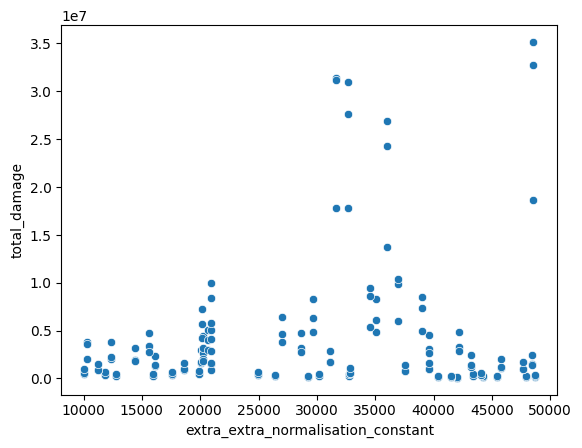

In [19]:
variable = 'extra_extra_normalisation_constant'

sns.scatterplot(data=df_regression, x=variable, y='total_damage')


## Doing the regression

### Without the equation dummies

In [20]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
#df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=False)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I', 'equation', 'coef'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     38.92
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           7.57e-23
Time:                        10:13:44   Log-Likelihood:                -2823.6
No. Observations:                 168   AIC:                             5657.
Df Residuals:                     163   BIC:                             5673.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                4.63e+09   1.46e+09      3.166      0.002    1.74e+09    7.52e+09
time                               -2.359e+06   7.43e+05     -3.177      0.002   -3.83e+06   -8.93e+05
extra_extra_exponent                1.119e+06   3.94e+05      2.841      0.005    3.41e+05     1.9e+06
extra_extra_normalisation_constant    81.9323     33.819      2.423      0.017      15.153     148.711
total_radiative_forcing             5.574e+07   1.57e+07      3.546      0.001    2.47e+07    8.68e+07
==============================================================================
Omnibus:                       94.965   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.253
Skew:                           2.204   Prob(JB):                     1.01e-93
Kurtosis:                       9.461   Cond. No.                     1.25e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

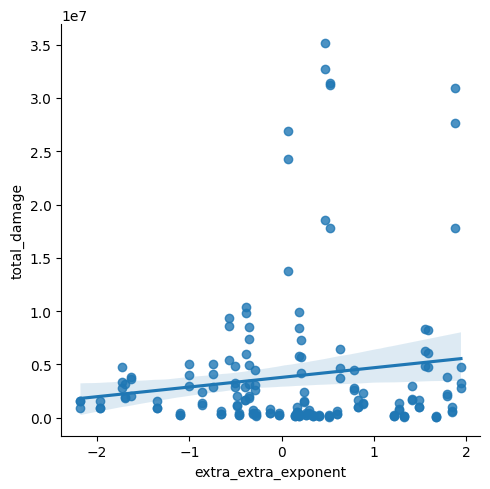

In [21]:
sns.lmplot(data=df_regression, x='extra_extra_exponent', y='total_damage')

### Without countries as dummy

In [22]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     27.60
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.28e-24
Time:                        10:13:44   Log-Likelihood:                -2813.4
No. Observations:                 168   AIC:                             5643.
Df Residuals:                     160   BIC:                             5668.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                          4.67e+09   1.39e+09      3.361      0.001    1.93e+09    7.41e+09
time                                          -2.38e+06   7.05e+05     -3.374      0.001   -3.77e+06   -9.87e+05
extra_extra_exponent                          1.042e+06   3.75e+05      2.780      0.006    3.02e+05    1.78e+06
extra_extra_normalisation_constant              88.3182     32.167      2.746      0.007      24.791     151.846
total_radiative_forcing                         5.6e+07   1.49e+07      3.750      0.000    2.65e+07    8.55e+07
coef                                          9.462e+04   2.44e+04      3.881      0.000    4.65e+04    1.43e+05
equation_dice_tot_eq_dice_total_impact       -1.361e+06   8.78e+05     -1.549      0.123   -3.09e+06    3.74e+05
equation_witness_tot_eq_witness_total_impact  6.746e+05   8.78e+05      0.768      0.443   -1.06e+06    2.41e+06
==============================================================================
Omnibus:                       87.486   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.959
Skew:                           2.075   Prob(JB):                     1.12e-73
Kurtosis:                       8.547   Cond. No.                     1.25e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,REGIONS 35 I,coef,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-1.098665,12818.021693,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,2.210159e+05,False,False
1,2005.0,-1.098665,12818.021693,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,2.669876e+05,True,False
2,2005.0,-1.098665,12818.021693,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,35.992621,4.511240e+05,False,True
3,2006.0,-0.277378,26412.828454,1.771211,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,37.101971,1.993559e+05,False,False
4,2006.0,-0.277378,26412.828454,1.771211,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,37.101971,2.405076e+05,True,False
...,...,...,...,...,...,...,...,...,...
163,2059.0,0.470184,48536.702854,4.250759,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,40.317500,1.859208e+07,True,False
164,2059.0,0.470184,48536.702854,4.250759,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,40.317500,3.274412e+07,False,True
165,2060.0,0.075333,35991.215967,4.301696,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,30.702805,2.691910e+07,False,False
166,2060.0,0.075333,35991.215967,4.301696,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,30.702805,1.373452e+07,True,False


### With countries as dummy

In [24]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation', 'REGIONS 35 I'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     37.96
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          1.14e-260
Time:                        10:13:44   Log-Likelihood:                -79190.
No. Observations:                5358   AIC:                         1.585e+05
Df Residuals:                    5316   BIC:                         1.587e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         1.361e+08   3.32e+07      4.100      0.000     7.1e+07    2.01e+08
time                                         -6.941e+04   1.69e+04     -4.119      0.000   -1.02e+05   -3.64e+04
extra_extra_exponent                          3.534e+04   9463.324      3.734      0.000    1.68e+04    5.39e+04
extra_extra_normalisation_constant               3.0904      0.776      3.984      0.000       1.570       4.611
total_radiative_forcing                       1.644e+06   3.57e+05      4.611      0.000    9.45e+05    2.34e+06
coef                                          1.308e+05   8233.717     15.885      0.000    1.15e+05    1.47e+05
equation_dice_tot_eq_dice_total_impact       -4.266e+04   2.13e+04     -2.001      0.045   -8.45e+04    -860.570
equation_witness_tot_eq_witness_total_impact  2.115e+04   2.13e+04      0.992      0.321   -2.06e+04     6.3e+04
REGIONS 35 I_BELGIUM                         -1.157e+05   8.28e+04     -1.397      0.162   -2.78e+05    4.67e+04
REGIONS 35 I_BULGARIA                        -1.149e+05   8.25e+04     -1.393      0.164   -2.77e+05    4.68e+04
REGIONS 35 I_CHINA                            1.258e+06   8.22e+04     15.297      0.000     1.1e+06    1.42e+06
REGIONS 35 I_CROATIA                          -9.67e+04   8.22e+04     -1.177      0.239   -2.58e+05    6.44e+04
REGIONS 35 I_CYPRUS                          -1.011e+05   8.22e+04     -1.230      0.219   -2.62e+05       6e+04
REGIONS 35 I_CZECH REPUBLIC                  -8.666e+04   8.21e+04     -1.055      0.291   -2.48e+05    7.44e+04
REGIONS 35 I_DENMARK                         -1.436e+05    8.3e+04     -1.731      0.084   -3.06e+05    1.91e+04
REGIONS 35 I_EASOC                            3.244e+05   8.21e+04      3.951      0.000    1.63e+05    4.85e+05
REGIONS 35 I_ESTONIA                         -9.373e+04   8.21e+04     -1.141      0.254   -2.55e+05    6.73e+04
REGIONS 35 I_FINLAND                         -1.152e+05   8.27e+04     -1.393      0.164   -2.77e+05    4.69e+04
REGIONS 35 I_FRANCE                           -2.74e+04   8.23e+04     -0.333      0.739   -1.89e+05    1.34e+05
REGIONS 35 I_GERMANY                          2.424e+05   8.39e+04      2.891      0.004     7.8e+04    4.07e+05
REGIONS 35 I_GREECE                          -9.438e+04   8.22e+04     -1.149      0.251   -2.55e+05    6.67e+04
REGIONS 35 I_HUNGARY                         -1.053e+05   8.22e+04     -1.281      0.200   -2.66e+05    5.59e+04
REGIONS 35 I_INDIA                           -1.148e+05   8.55e+04     -1.342      0.179   -2.82e+05    5.29e+04
REGIONS 35 I_IRELAND                         -9.401e+04   8.22e+04     -1.144      0.253   -2.55e+05    6.71e+04
REGIONS 35 I_ITALY              